In [1]:
import os
import pickle as pkl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
DATASET_ROOT_PATH = '/home/ubuntu/projects/ddos/cicddos_data/core'
X_TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'X_train.csv')
Y_TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'Y_train.csv')
X_TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'X_test.csv')
Y_TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'Y_test.csv')

In [3]:
X_train = pd.read_csv(X_TRAIN_PATH, low_memory=False)
Y_train = pd.read_csv(Y_TRAIN_PATH, low_memory=False)

X_test = pd.read_csv(X_TEST_PATH, low_memory=False)
Y_test = pd.read_csv(Y_TEST_PATH, low_memory=False)

In [4]:
label_cols = ['Label']

numeric_cols = ['URG Flag Count', 'Fwd PSH Flags',
    'RST Flag Count', 'CWE Flag Count', 'Packet Length Std',
    'Init_Win_bytes_forward', 'Fwd Packet Length Std', 'Active Mean',
    'Idle Mean', 'Avg Fwd Segment Size',
    'Fwd Packet Length Mean', 'Fwd Packets/s', 'Packet Length Mean',
    'Average Packet Size', 'Fwd IAT Min', 'Flow Duration',
    'Fwd IAT Total', 'Active Std', 'SYN Flag Count', 'Fwd IAT Std', 
    'Flow IAT Std', 'Subflow Fwd Bytes', 'Total Length of Fwd Packets']

categoric_cols = [
    'Protocol',
    'Inbound'
]

## Custom Transformers

In [5]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_names):
        self.col_names = col_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.col_names].values

# Pipeline

#### individual pipelines

In [6]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric_cols)),
    ('std_scaler', StandardScaler())
])

In [7]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(categoric_cols)),
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

#### Feature Union

In [8]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

# Run pipeline

In [17]:
X = full_pipeline.fit_transform(X_train)

# Train

## PCA

In [10]:
from sklearn.decomposition import PCA

/home/ubuntu/Envs/ddos/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Visualizing DDoS attacks through PCA')

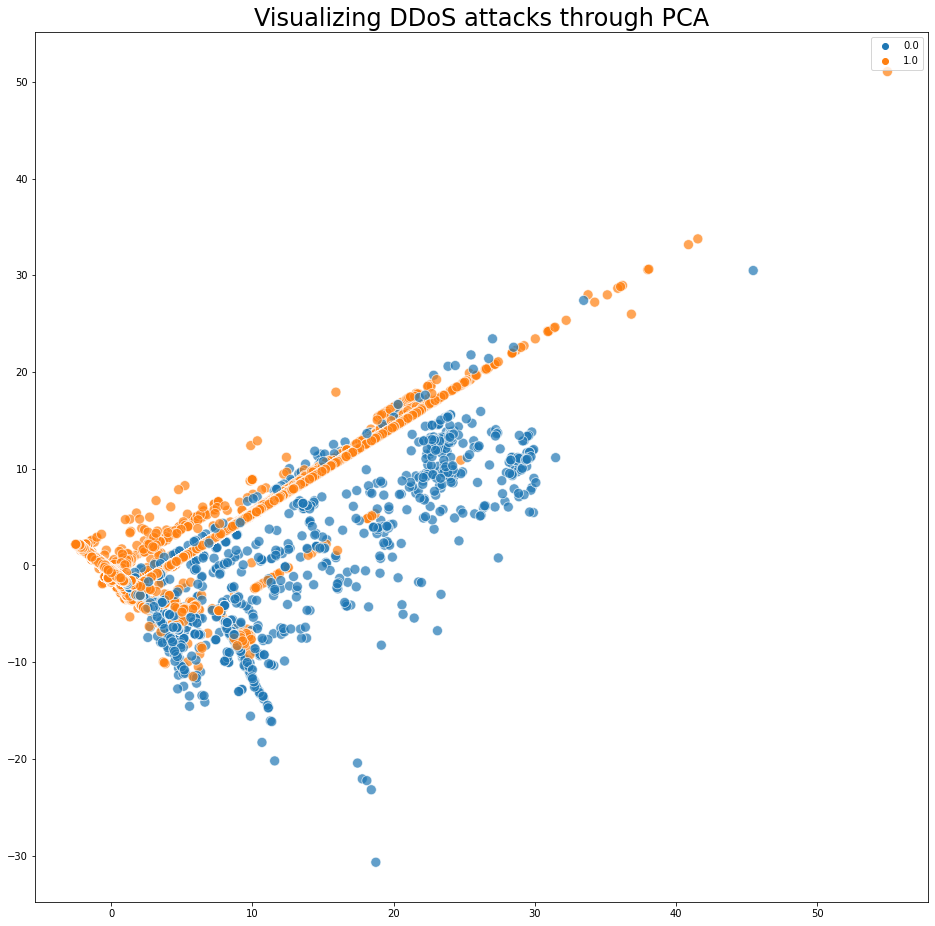

In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=Y_train.values.reshape(Y_train.values.shape[0], ), cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24)

## TSNE

/home/ubuntu/Envs/ddos/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ubuntu/Envs/ddos/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ubuntu/Envs/ddos/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Visualizing DDoS attacks through t-SNE')

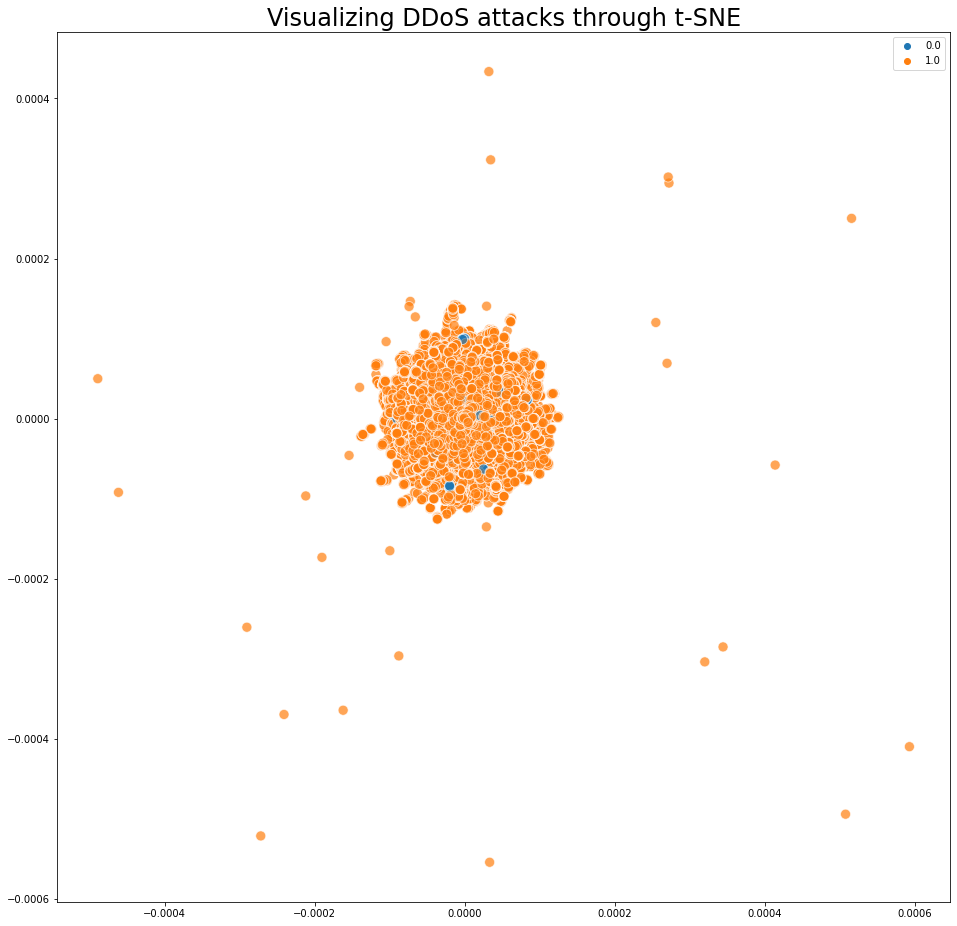

In [19]:
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=Y_train.values.reshape(Y_train.values.shape[0], ), cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24)

# Pickling the model

In [20]:
MODEL_PICKLE_ROOT = '/home/ubuntu/projects/ddos/pkls/models'

PICKLE_PCA_FILE_PATH = os.path.join(MODEL_PICKLE_ROOT, 'pca_28.pkl')

In [22]:
with open(PICKLE_PCA_FILE_PATH, 'wb') as f:
    pkl.dump(pca, f)

In [23]:
PICKLE_TSNE_FILE_PATH = os.path.join(MODEL_PICKLE_ROOT, 'tsne_28.pkl')

In [25]:
with open(PICKLE_TSNE_FILE_PATH, 'wb') as f:
    pkl.dump(tsne_, f)